# io module examples

In this module we demonstrate Pymagicc's io capabilities.

In [1]:
# NBVAL_IGNORE_OUTPUT
from os import listdir
from os.path import join, dirname
from pprint import pprint

import pandas as pd
import pymagicc
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError

import expectexception

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [2]:
import matplotlib.pyplot as plt
plt.style.use('bmh') 
%matplotlib inline

In [3]:
MAGICC6_DIR = join("..", "pymagicc", "MAGICC6", "run")
TEST_DATA_DIR = join("..", "tests", "test_data")

## Read files

`MAGICCData` is the key object in Pymagicc's io module. This object allows us to easily read/write MAGICC input files. Its `__init__` docstring explains how a `MAGICCData` instance can be initialised.

In [4]:
print(MAGICCData.__init__.__doc__)


        Initialise a MAGICCData instance

        Here we provide a brief over of inputs, for more details
        see ``scmdata.ScmDataFrame``.

        Parameters
        ----------
        data: pd.DataFrame, pd.Series, np.ndarray or string
            A pd.DataFrame or data file, or a numpy array of timeseries data if `columns` is specified.
            If a string is passed, data will be attempted to be read from file.

        columns: dict
            Dictionary to use to write the metadata for each timeseries in data. MAGICCData will
            also attempt to infer values from data. Any values in columns will be used in
            preference to any values found in data. The default value for "model", "scenario"
            and "climate_model" is "unspecified". See ``scmdata.ScmDataFrame`` for details.

        kwargs:
            Additional parameters passed to `pyam.core.read_files` to read non-standard files.
        


Here we load a file from disk and tell MAGICCData to set the scenario column to "Historical".

In [5]:
# NBVAL_IGNORE_OUTPUT
mdata = MAGICCData(
    join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"),
    columns={"scenario": ["Historical"]},
)
mdata.head()

time                                                                                                         1765-01-01  1766-01-01  1767-01-01  1768-01-01  1769-01-01  1770-01-01  1771-01-01  ...  2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model       scenario   region       variable                                   unit      climate_model todo                                                                                      ...                                                   
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003       0.003       0.003       0.003       0.003       0.003       0.004  ...    3.191413    3.222115    3.207797    3.254795   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000       0.000       0.000       0.000       0.000       0.000       0.000  ...    0.823591    0.848947    0.839392    0.873314   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000       0.000       0.000       0.000       0.000       0.000       0.000  ...    1.768203    1.849029    1.922234    2.142218   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000       0.000       0.000       0.000       0.000       0.000       0.000  ...    0.580790    0.588493    0.600686    0.627772   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000       0.000       0.000       0.000       0.000       0.000       0.000  ...    0.371003    0.387415    0.378892    0.387901   

time                                                                                                         2004-01-01  2005-01-01  2006-01-01  
model       scenario   region       variable                                   unit      climate_model todo                                      
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET     3.309538    3.348200    3.345523  
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET     0.884219    0.892192    0.925998  
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET     2.417585    2.608225    2.795696  
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET     0.669433    0.710151    0.728964  
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET     0.391226    0.412232    0.433820  

[5 rows x 242 columns]

Any metadata which is found in the file is included in `MAGICCData`'s `metadata` attribute.

In [6]:
pprint(mdata.metadata)

{'contact': 'Base year emissions inventories: Steve Smith (ssmith@pnl.gov) and '
            'Jean-Francois Lamarque (Jean-Francois.Lamarque@noaa.gov); RCP '
            '3-PD (IMAGE): Detlef van Vuuren (detlef.vanvuuren@pbl.nl); RCP '
            '4.5 (MiniCAM): Allison Thomson (Allison.Thomson@pnl.gov); RCP 6.0 '
            '(AIM): Toshihiko Masui (masui@nies.go.jp); RCP 8.5 (MESSAGE): '
            'Keywan Riahi (riahi@iiasa.ac.at); Concentrations & Forcing '
            'compilation: Malte Meinshausen (malte.meinshausen@pik-potsdam.de)',
 'data': 'Historical fossil&industrial CO2 (CO2I) Emissions '
         '(HISTRCP_CO2I_EMIS)',
 'header': 'RCPTOOL - MAGICC 6.X DATA FILE\n'
           'VERSION:   ALPHA - FIRST DRAFT - PRIMAP xls file written on 02 Sep '
           '2009, 17:04:37',
 'source': 'RCP data as presented on '
           'http://www.iiasa.ac.at/web-apps/tnt/RcpDb, August 2009'}


## Filtering

As `MAGICCData` subclasses OpenSCM's `ScmDataFrame`, we get access to all of its useful capabilities, for example filtering.

In [7]:
# NBVAL_IGNORE_OUTPUT
mdata.filter(region="*R5ASIA").head()

,,,,,,time,1765-01-01,1766-01-01,1767-01-01,1768-01-01,1769-01-01,1770-01-01,1771-01-01,...,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01
model,scenario,region,variable,unit,climate_model,todo,,,,,,,,,,,,,,,
unspecified,Historical,World|R5ASIA,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,unspecified,SET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.768203,1.849029,1.922234,2.142218,2.417585,2.608225,2.795696


### Reading SCEN files

We can also read SCEN files. These are particularly tricky as the underlying data format is unique.

In [8]:
# NBVAL_IGNORE_OUTPUT
mdata = mdata.append(
    join(MAGICC6_DIR, "RCP45.SCEN"),
    columns={"model": ["MiniCAM"]},
)
mdata.head()

time                                                                                                   1765-01-01 00:00:00  1766-01-01 00:00:00  1767-01-01 00:00:00  1768-01-01 00:00:00  1769-01-01 00:00:00  1770-01-01 00:00:00  \
model       scenario region variable                                   unit        climate_model todo                                                                                                                                 
unspecified RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                   NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
                            Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                   NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
                            Emissions|Aerosols|Direct Effect|BC        Mt BC / yr  unspecified   SET                   NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
                            Emissions|CH4                              Mt CH4 / yr unspecified   SET                   NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
                            Emissions|CO                               Mt CO / yr  unspecified   SET                   NaN                  NaN                  NaN                  NaN                  NaN                  NaN   

time                                                                                                   1771-01-01 00:00:00  ...  2280-01-01 00:00:00  2290-01-01 00:00:00  2300-01-01 00:00:00  2350-01-01 00:00:00  2400-01-01 00:00:00  \
model       scenario region variable                                   unit        climate_model todo                       ...                                                                                                            
unspecified RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                   NaN  ...               0.0000               0.0000               0.0000               0.0000               0.0000   
                            Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                   NaN  ...               0.7836               0.7608               0.7403               0.6611               0.6054   
                            Emissions|Aerosols|Direct Effect|BC        Mt BC / yr  unspecified   SET                   NaN  ...               3.8621               3.8621               3.8621               3.8621               3.8621   
                            Emissions|CH4                              Mt CH4 / yr unspecified   SET                   NaN  ...             268.2172             268.3406             268.4593             268.9937             269.4492   
                            Emissions|CO                               Mt CO / yr  unspecified   SET                   NaN  ...             477.2996             477.2996             477.2996             477.2996             477.2996   

time                                                                                                   2450-01-01 00:00:00  2500-01-01 00:00:00  
model       scenario region variable                                   unit        climate_model todo                                            
unspecified RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                0.0000               0.0000  
                            Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                0.5621               0.6745  
                            Emissions|Aerosols|Direct Effect|BC        Mt BC / yr  unspecified   SET                3.8621               3.8621  

In [9]:
# NBVAL_IGNORE_OUTPUT
mdata.filter(
    variable="*BC",
    region="*ASIA"
).head()

,,,,,,time,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,...,2280-01-01 00:00:00,2290-01-01 00:00:00,2300-01-01 00:00:00,2350-01-01 00:00:00,2400-01-01 00:00:00,2450-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,climate_model,todo,,,,,,,,,,,,,,,
unspecified,RCP45,World|R5ASIA,Emissions|Aerosols|Direct Effect|BC,Mt BC / yr,unspecified,SET,3.0468,3.109,3.1818,3.2546,3.3274,3.4002,3.4057,...,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791


### Reading RCP data files

We can also read the RCP data files provided at http://www.pik-potsdam.de/~mmalte/rcps/. These are also tricky as the underlying data format is unique. 

In the cell below we read a file from disk and we set the model column to be "IMAGE", the scenario column to be "RCP26" and the climate_model column to be "MAGICC6".

<div class="alert alert-danger">
  <strong>Danger!</strong> As Pymagicc (and OpenSCM) are closely related to Pyam, we always use the word "model" to refer to integrated assessment model. Information related to climate models should always go in the "climate_model" column.
</div>

In [10]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data = MAGICCData(
    join(TEST_DATA_DIR, "RCP3PD_EMISSIONS.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    }
)
rcp_online_data.head()

time                                                                                              1765-01-01 00:00:00  1766-01-01 00:00:00  1767-01-01 00:00:00  1768-01-01 00:00:00  1769-01-01 00:00:00  1770-01-01 00:00:00  1771-01-01 00:00:00  \
model scenario region variable                                   unit         climate_model todo                                                                                                                                                      
IMAGE RCP26    World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    MAGICC6       SET                 0.003             0.003000             0.003000             0.003000             0.003000             0.003000             0.004000   
                      Emissions|CO2|MAGICC AFOLU                 Gt C / yr    MAGICC6       SET                 0.000             0.005338             0.010677             0.016015             0.021353             0.026691             0.032030   
                      Emissions|CH4                              Mt CH4 / yr  MAGICC6       SET                 0.000             1.963262             2.436448             2.911105             3.387278             3.865015             4.344362   
                      Emissions|N2O                              Mt N2ON / yr MAGICC6       SET                 0.000             0.005191             0.010117             0.015043             0.019969             0.024896             0.029822   
                      Emissions|Aerosols|Direct Effect|SOx       Mt S / yr    MAGICC6       SET                 0.000             0.098883             0.116306             0.133811             0.151398             0.169070             0.186831   

time                                                                                              ...  2494-01-01 00:00:00  2495-01-01 00:00:00  2496-01-01 00:00:00  2497-01-01 00:00:00  2498-01-01 00:00:00  2499-01-01 00:00:00  2500-01-01 00:00:00  
model scenario region variable                                   unit         climate_model todo  ...                                                                                                                                                     
IMAGE RCP26    World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    MAGICC6       SET   ...              -0.9308              -0.9308              -0.9308              -0.9308              -0.9308              -0.9308              -0.9308  
                      Emissions|CO2|MAGICC AFOLU                 Gt C / yr    MAGICC6       SET   ...               0.0000               0.0000               0.0000               0.0000               0.0000               0.0000               0.0000  
                      Emissions|CH4                              Mt CH4 / yr  MAGICC6       SET   ...             142.0527             142.0527             142.0527             142.0527             142.0527             142.0527             142.0527  
                      Emissions|N2O                              Mt N2ON / yr MAGICC6       SET   ...               5.2823               5.2823               5.2823               5.2823               5.2823               5.2823               5.2823  
                      Emissions|Aerosols|Direct Effect|SOx       Mt S / yr    MAGICC6       SET   ...               6.4552               6.4552               6.4552               6.4552               6.4552               6.4552               6.4552  

[5 rows x 736 columns]

In [11]:
rcp_online_data[["variable", "unit"]]

,variable,unit
0,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
1,Emissions|CO2|MAGICC AFOLU,Gt C / yr
2,Emissions|CH4,Mt CH4 / yr
3,Emissions|N2O,Mt N2ON / yr
4,Emissions|Aerosols|Direct Effect|SOx,Mt S / yr
5,Emissions|CO,Mt CO / yr
6,Emissions|NMVOC,Mt NMVOC / yr
7,Emissions|Aerosols|Direct Effect|NOx,Mt N / yr
8,Emissions|Aerosols|Direct Effect|BC,Mt BC / yr
9,Emissions|Aerosols|Direct Effect|OC,Mt OC / yr


### Append

We can then append other RCP3PD data, e.g. concentrations, to the same `MAGICCData` instance using its `append` method. 

In [12]:
print(rcp_online_data.append.__doc__)


        Append any input which can be converted to MAGICCData to self.

        Parameters
        ----------
        other : MAGICCData, pd.DataFrame, pd.Series, str
            Source of data to append.

        inplace : bool
            If True, append ``other`` inplace, otherwise return a new ``MAGICCData``
            instance.

        constructor_kwargs : dict
            Passed to ``MAGICCData`` constructor (only used if ``other`` is not a
            ``MAGICCData`` instance).

        **kwargs
            Passed to ``super().append()``
        


In this case we want to append a file from disk and we want the appended file's model column to be "IMAGE", its scenario column to be "RCP26" and its climate_model column to be "MAGICC6".

In [13]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_CONCENTRATIONS.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    },
    inplace=True,
)
rcp_online_data.head()

time                                                                                             1765-01-01 00:00:00  1766-01-01 00:00:00  1767-01-01 00:00:00  1768-01-01 00:00:00  1769-01-01 00:00:00  1770-01-01 00:00:00  1771-01-01 00:00:00  ...  \
model scenario region variable                                   unit        climate_model todo                                                                                                                                                     ...   
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET                 0.000             0.005338             0.010677             0.016015             0.021353             0.026691             0.032030  ...   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET                 0.003             0.003000             0.003000             0.003000             0.003000             0.003000             0.004000  ...   
                      Emissions|Aerosols|Direct Effect|BC        Mt BC / yr  MAGICC6       SET                 0.000             0.106998             0.133383             0.159847             0.186393             0.213024             0.239742  ...   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET                 0.000             1.963262             2.436448             2.911105             3.387278             3.865015             4.344362  ...   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET                 0.000             9.050221            12.960844            16.876539            20.797465            24.723782            28.655658  ...   

time                                                                                             2494-01-01 00:00:00  2495-01-01 00:00:00  2496-01-01 00:00:00  2497-01-01 00:00:00  2498-01-01 00:00:00  2499-01-01 00:00:00  2500-01-01 00:00:00  
model scenario region variable                                   unit        climate_model todo                                                                                                                                                     
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET                0.0000               0.0000               0.0000               0.0000               0.0000               0.0000               0.0000  
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET               -0.9308              -0.9308              -0.9308              -0.9308              -0.9308              -0.9308              -0.9308  
                      Emissions|Aerosols|Direct Effect|BC        Mt BC / yr  MAGICC6       SET                3.3578               3.3578               3.3578               3.3578               3.3578               3.3578               3.3578  
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              142.0527             142.0527             142.0527             142.0527             142.0527             142.0527             142.0527  
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET              607.8438             607.8438             607.8438             607.8438             607.8438             607.8438             607.8438  

[5 rows x 736 columns]

In [14]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data[["variable", "unit"]]

,variable,unit
0,Emissions|CO2|MAGICC AFOLU,Gt C / yr
1,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
2,Emissions|Aerosols|Direct Effect|BC,Mt BC / yr
3,Emissions|CH4,Mt CH4 / yr
4,Emissions|CO,Mt CO / yr
5,Emissions|Aerosols|Direct Effect|NH3,Mt N / yr
6,Emissions|Aerosols|Direct Effect|NOx,Mt N / yr
7,Emissions|N2O,Mt N2ON / yr
8,Emissions|NMVOC,Mt NMVOC / yr
9,Emissions|Aerosols|Direct Effect|OC,Mt OC / yr


We can also append the radiative forcing information.

In [15]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data = rcp_online_data.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_RADFORCING.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    }
)
rcp_online_data.head()

time                                                                                             1765-01-01 00:00:00  1766-01-01 00:00:00  1767-01-01 00:00:00  1768-01-01 00:00:00  1769-01-01 00:00:00  1770-01-01 00:00:00  1771-01-01 00:00:00  ...  \
model scenario region variable                                   unit        climate_model todo                                                                                                                                                     ...   
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET                 0.000             0.005338             0.010677             0.016015             0.021353             0.026691             0.032030  ...   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET                 0.003             0.003000             0.003000             0.003000             0.003000             0.003000             0.004000  ...   
                      Emissions|Aerosols|Direct Effect|BC        Mt BC / yr  MAGICC6       SET                 0.000             0.106998             0.133383             0.159847             0.186393             0.213024             0.239742  ...   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET                 0.000             1.963262             2.436448             2.911105             3.387278             3.865015             4.344362  ...   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET                 0.000             9.050221            12.960844            16.876539            20.797465            24.723782            28.655658  ...   

time                                                                                             2494-01-01 00:00:00  2495-01-01 00:00:00  2496-01-01 00:00:00  2497-01-01 00:00:00  2498-01-01 00:00:00  2499-01-01 00:00:00  2500-01-01 00:00:00  
model scenario region variable                                   unit        climate_model todo                                                                                                                                                     
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET                0.0000               0.0000               0.0000               0.0000               0.0000               0.0000               0.0000  
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET               -0.9308              -0.9308              -0.9308              -0.9308              -0.9308              -0.9308              -0.9308  
                      Emissions|Aerosols|Direct Effect|BC        Mt BC / yr  MAGICC6       SET                3.3578               3.3578               3.3578               3.3578               3.3578               3.3578               3.3578  
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              142.0527             142.0527             142.0527             142.0527             142.0527             142.0527             142.0527  
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET              607.8438             607.8438             607.8438             607.8438             607.8438             607.8438             607.8438  

[5 rows x 736 columns]

In [16]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data[["variable","unit"]]

,variable,unit
0,Emissions|CO2|MAGICC AFOLU,Gt C / yr
1,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
2,Emissions|Aerosols|Direct Effect|BC,Mt BC / yr
3,Emissions|CH4,Mt CH4 / yr
4,Emissions|CO,Mt CO / yr
5,Emissions|Aerosols|Direct Effect|NH3,Mt N / yr
6,Emissions|Aerosols|Direct Effect|NOx,Mt N / yr
7,Emissions|N2O,Mt N2ON / yr
8,Emissions|NMVOC,Mt NMVOC / yr
9,Emissions|Aerosols|Direct Effect|OC,Mt OC / yr


Making the most of `MAGICCData`'s data analysis features can allow all sorts of plots to be made with little difficulty.

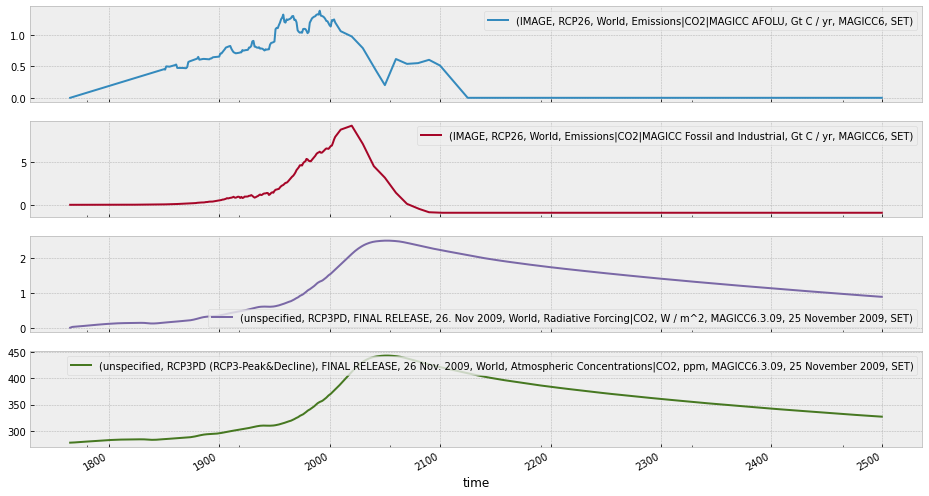

In [17]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data.filter(
    variable="*CO2*",
    region="World"
).filter(
    variable="*Eq*",
    keep=False
).filter(
    variable="*,*",
    keep=False
).timeseries().T.plot(subplots=True, figsize=(16, 9));

### Reading all files in run directory

The lines below show how you can read every file in the run directory into a dictionary, should you wish to.

In [18]:
all_run_files = {}

for file in listdir(MAGICC6_DIR):
    
    if file.endswith((".exe", ".MON")):
        continue
    elif file.endswith(".CFG"):
        all_run_files[file] = read_cfg_file(
            join(MAGICC6_DIR, file)
        )
    else:   
        all_run_files[file] = MAGICCData(join(MAGICC6_DIR, file))

In [19]:
sorted(all_run_files.keys())

['1PCTCO2_CO2_CONC.IN',
 'ABRUPT2XCO2_CO2_CONC.IN',
 'EDGAR_NOXB_EMIS.IN',
 'EDGAR_NOXI_EMIS.IN',
 'GISS_BCB_OT.IN',
 'GISS_BCB_RF.IN',
 'GISS_BCI_OT.IN',
 'GISS_BCI_RF.IN',
 'GISS_BCSNOW_RF.IN',
 'GISS_LANDUSE_RF.IN',
 'GISS_NOX_RF.IN',
 'GISS_OCB_OT.IN',
 'GISS_OCB_RF.IN',
 'GISS_OCI_OT.IN',
 'GISS_OCI_RF.IN',
 'GISS_OCN_OT.IN',
 'GISS_SOXI_OT.IN',
 'GISS_SOXNB_OT.IN',
 'GISS_SOX_RF.IN',
 'GISS_SS_OT.IN',
 'HISTRCP2009_SOLAR_RF.IN',
 'HISTRCP45SCP45to3PD_SOLAR_RF.IN',
 'HISTRCP45_SOLAR_RF.IN',
 'HISTRCP60_2300_SOLAR_RF.IN',
 'HISTRCP6SCP6to45_SOLAR_RF.IN',
 'HISTRCP6_SOLAR_RF.IN',
 'HISTRCP85_SOLAR_RF.IN',
 'HISTRCP_BCB_EMIS.IN',
 'HISTRCP_BCI_EMIS.IN',
 'HISTRCP_C2F6_CONC.IN',
 'HISTRCP_C2F6_EMIS.IN',
 'HISTRCP_C6F14I_EMIS.IN',
 'HISTRCP_C6F14_CONC.IN',
 'HISTRCP_C6F14_EMIS.IN',
 'HISTRCP_CF4_CONC.IN',
 'HISTRCP_CF4_EMIS.IN',
 'HISTRCP_CH4B_EMIS.IN',
 'HISTRCP_CH4I_EMIS.IN',
 'HISTRCP_CH4_CONC.IN',
 'HISTRCP_CO2B_EMIS.IN',
 'HISTRCP_CO2I_EMIS.IN',
 'HISTRCP_CO2_CONC.IN',
 'HISTRCP_C

In [20]:
all_run_files["SRESB2.SCEN"].head()

time                                                                                                         1990-01-01 00:00:00  2000-01-01 00:00:00  2010-01-01 00:00:00  2020-01-01 00:00:00  2030-01-01 00:00:00  2040-01-01 00:00:00  \
model       scenario   region    variable                                   unit         climate_model todo                                                                                                                                 
unspecified B2_MESSAGE World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                0.7152               1.0116               1.2639               1.4831               1.8822               2.2423   
                                 Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.7321               0.8169               0.6338               0.4206               0.1234               0.0068   
                                 Emissions|CH4                              Mt CH4 / yr  unspecified   SET               76.7245              85.1631              94.4740             101.6967             111.8402             129.4583   
                                 Emissions|N2O                              Mt N2ON / yr unspecified   SET                1.1778               1.2938               0.6886               0.6016               0.5458               0.5652   
                                 Emissions|Aerosols|Direct Effect|SOx       Mt S / yr    unspecified   SET               10.5377              12.7760              14.4000              15.2410              16.6818              17.8013   

time                                                                                                         2050-01-01 00:00:00  2060-01-01 00:00:00  2070-01-01 00:00:00  2080-01-01 00:00:00  2090-01-01 00:00:00  2100-01-01 00:00:00  
model       scenario   region    variable                                   unit         climate_model todo                                                                                                                                
unspecified B2_MESSAGE World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                2.6046               3.0441               3.2744               3.5528               3.7887               3.8444  
                                 Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET               -0.1098              -0.1058              -0.1018              -0.1204              -0.1617              -0.2029  
                                 Emissions|CH4                              Mt CH4 / yr  unspecified   SET              148.7465             161.6487             175.2910             186.7285             192.6714             199.8942  
                                 Emissions|N2O                              Mt N2ON / yr unspecified   SET                0.5841               0.6267               0.6686               0.7074               0.7425               0.7705  
                                 Emissions|Aerosols|Direct Effect|SOx       Mt S / yr    unspecified   SET               19.3640              20.0495              19.5599              19.0788              17.9626              17.1951

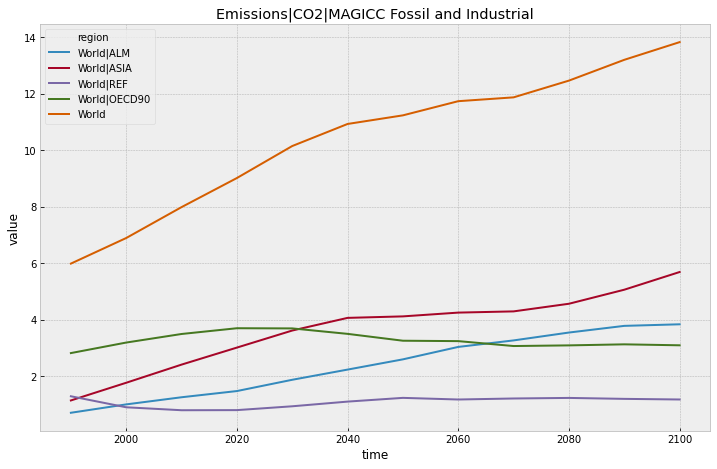

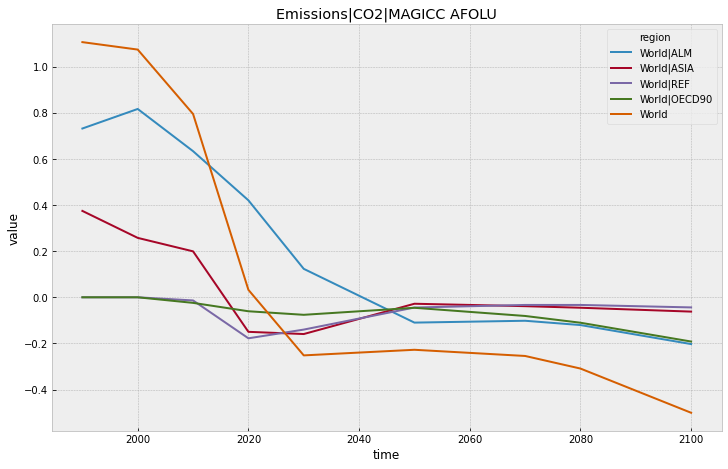

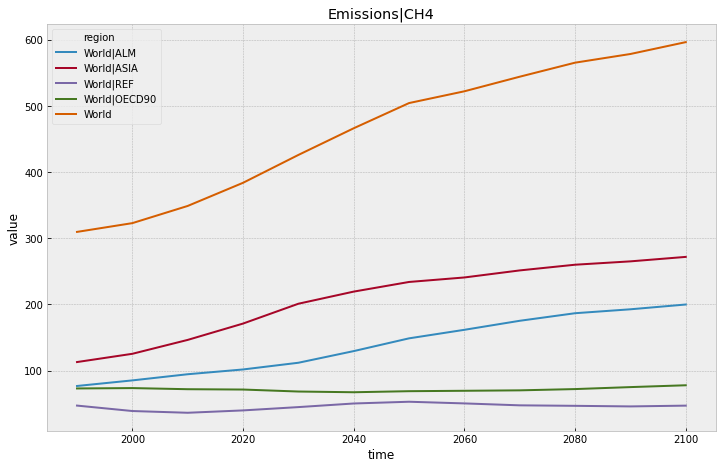

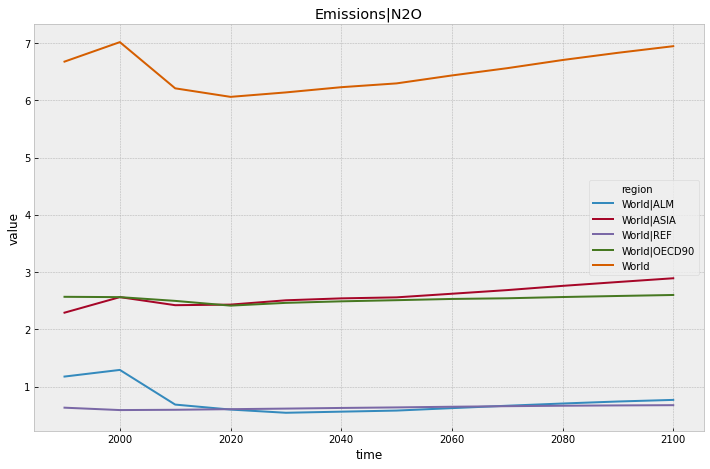

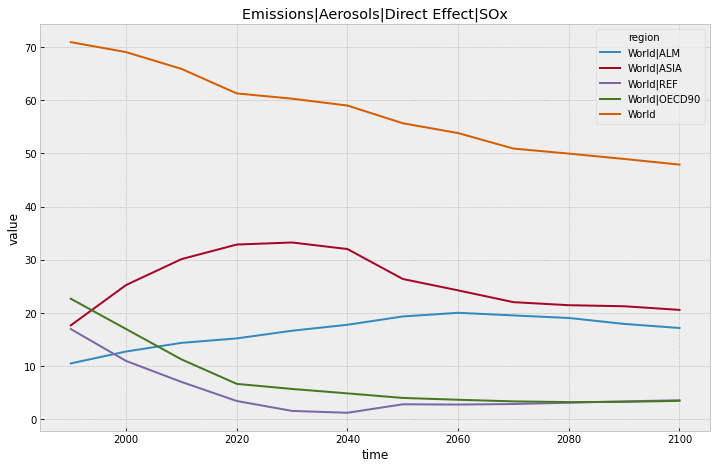

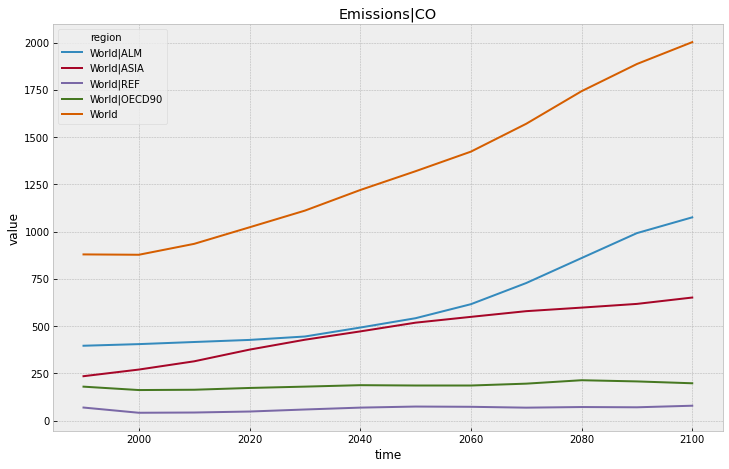

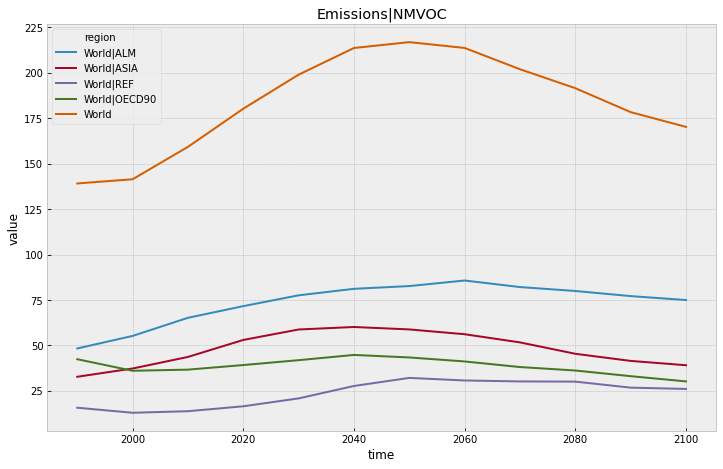

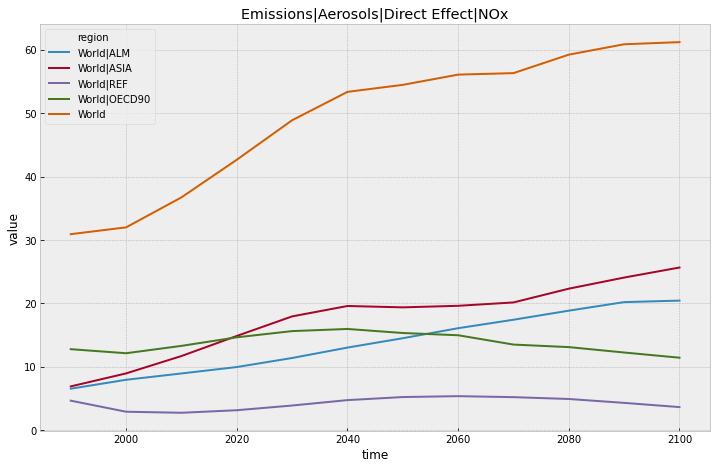

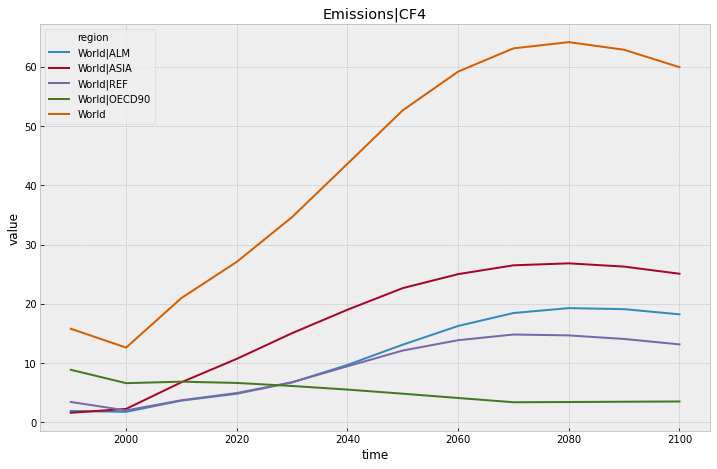

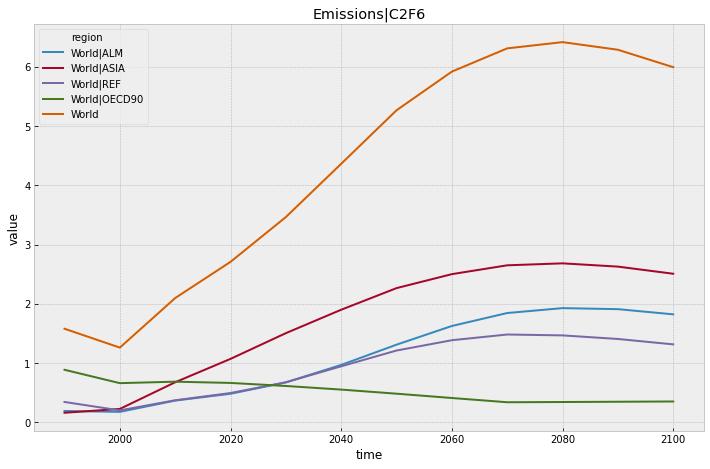

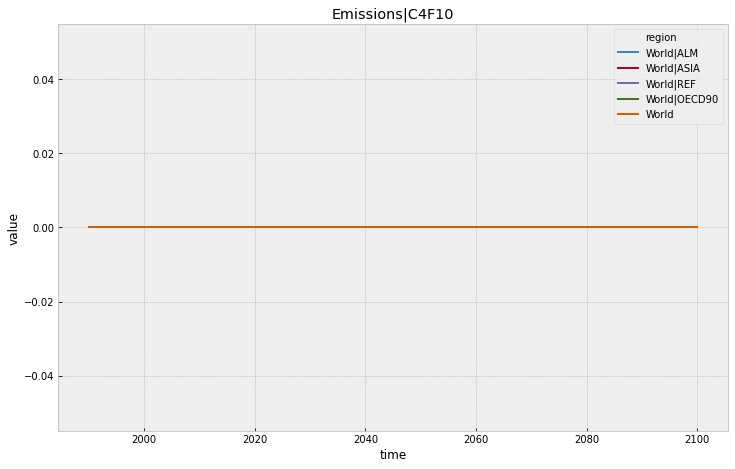

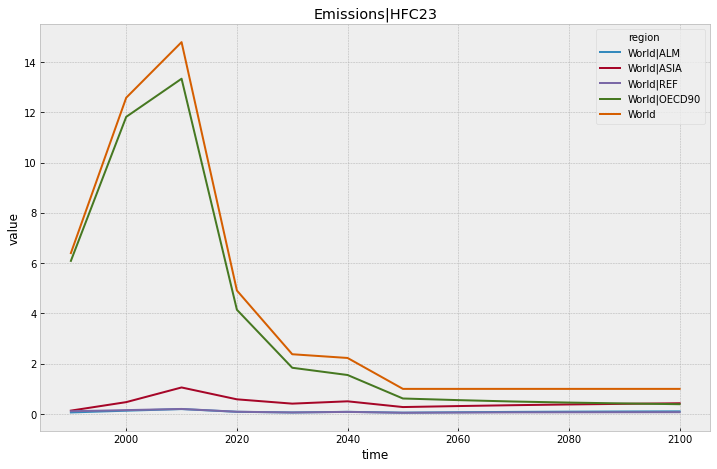

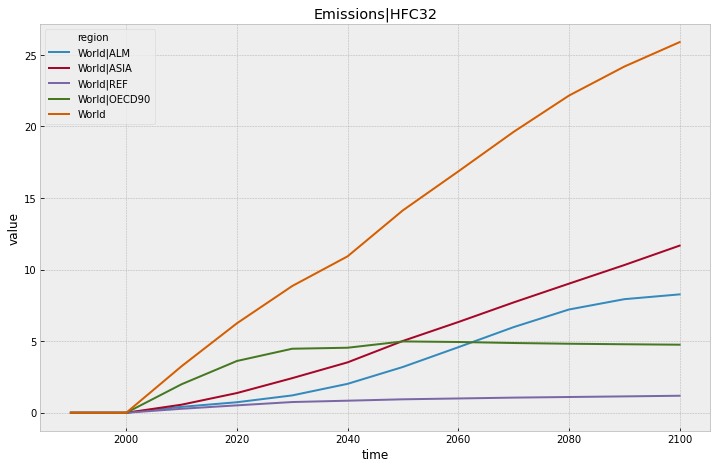

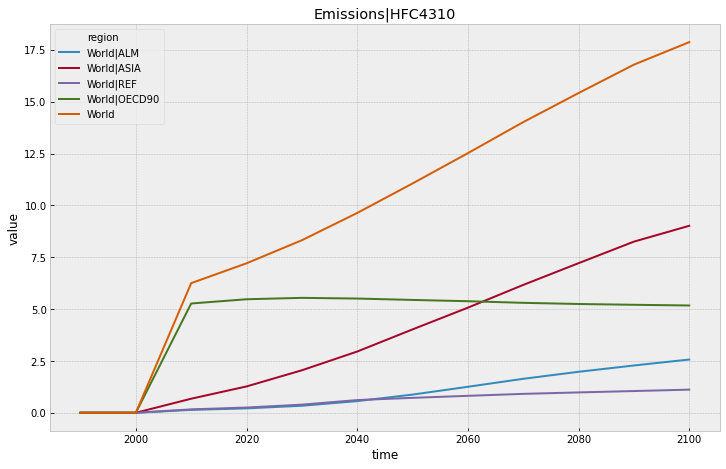

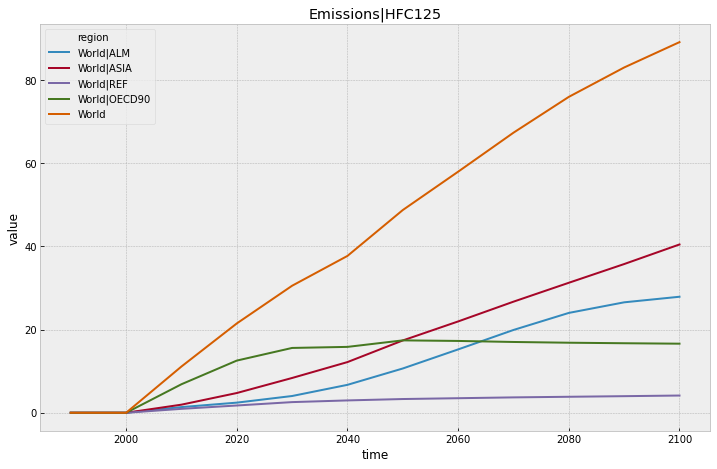

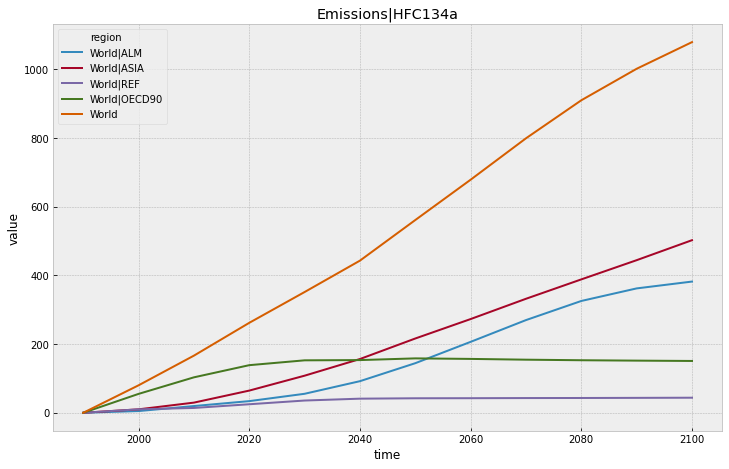

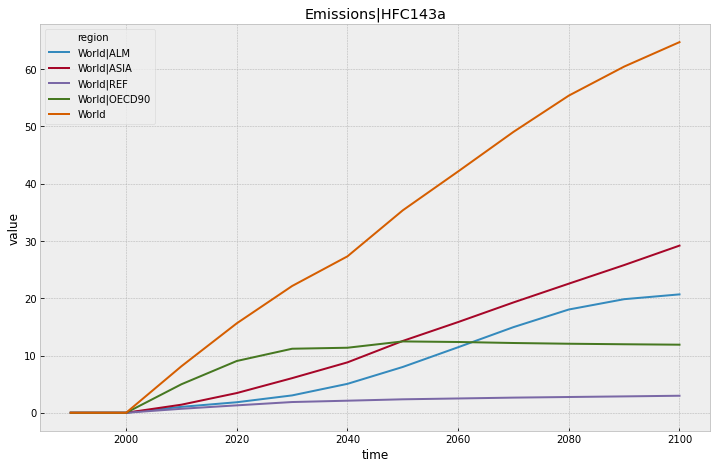

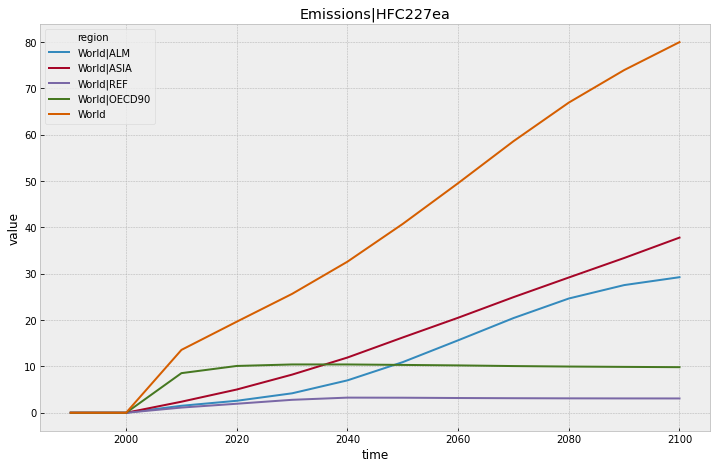

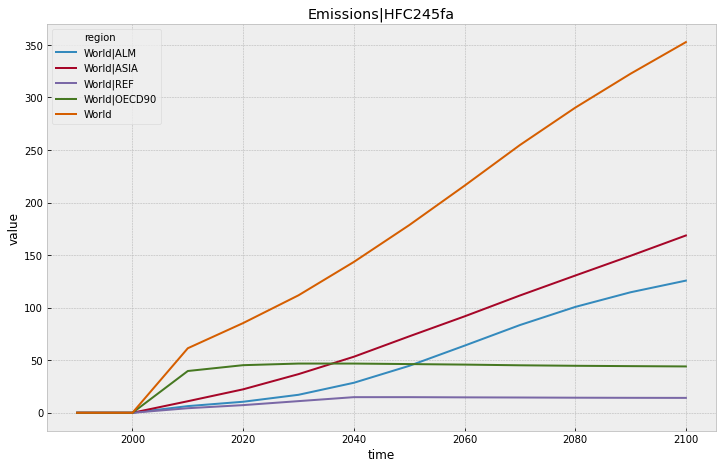

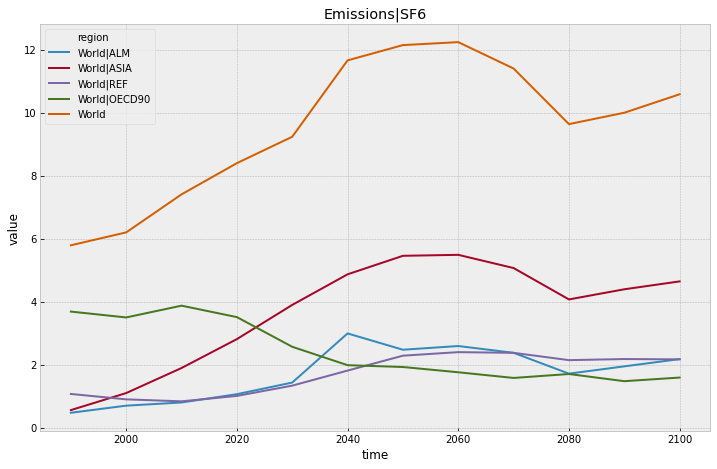

In [21]:
for g in all_run_files["SRESB2.SCEN"].groupby("variable"):
    plt.figure(figsize=(12, 7.5))
    g.lineplot(hue="region").set_title(g.get_unique_meta("variable", True))

## Writing files

Once you have your data in a `MAGICCData` instance, writing files is trivial. To write a file, you pass in the path you want to write the file to and the MAGICC version for which you want to write the file.

In [22]:
print(MAGICCData.write.__doc__)


        Write an input file to disk.

        For more information on file conventions, see :ref:`magicc_file_conventions`.

        Parameters
        ----------
        filepath : str
            Filepath of the file to write.

        magicc_version : int
            The MAGICC version for which we want to write files. MAGICC7 and MAGICC6
            namelists are incompatible hence we need to know which one we're writing
            for.
        


In [23]:
mdata = MAGICCData(join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"))
mdata.write("HISTEXAMPLE_CO2I_EMIS.IN", magicc_version=7)

mdata = MAGICCData(join(MAGICC6_DIR, "RCP45.SCEN"))
mdata.write("SCENEXAMPLE.SCEN", magicc_version=7)

However, note that the format to write in is determined by the filename. Hence you can't just use any filename, it has to follow MAGICC's internal conventions, see [the docs](https://pymagicc.readthedocs.io/en/latest/file_conventions.html). Our error messaging will hopefully make this slightly clearer.

In [24]:
%%expect_exception NoReaderWriterError
mdata.write("histexample.txt", magicc_version=7)

---------------------------------------------------------------------------
NoReaderWriterError                       Traceback (most recent call last)
<ipython-input-24-20ac4c194f29> in <module>
----> 1 mdata.write("histexample.txt", magicc_version=7)

~/code/uom/pymagicc/pymagicc/io.py in write(self, filepath, magicc_version)
   3321             for.
   3322         """
-> 3323         writer = determine_tool(filepath, "writer")(magicc_version=magicc_version)
   3324         writer.write(self, filepath)
   3325 

~/code/uom/pymagicc/pymagicc/io.py in determine_tool(filepath, tool_to_get)
   3491         )
   3492 
-> 3493     raise NoReaderWriterError(error_msg)
   3494 
   3495 

NoReaderWriterError: Couldn't find appropriate writer for histexample.txt.
The file must be one of the following types and the filepath must match its corresponding regular expression:
SCEN: ^.*\.SCEN$
SCEN7: ^.*\.SCEN7$
prn: ^.*\.prn$
EmisIn: ^.*\_EMIS.*\.IN$
ConcIn: ^.*\_CONC.*\.IN$
OpticalThicknessIn: ^.